In [1]:
from utils.Vec2d import Vec2d
from utils.GridSearch import GridSearch
from utils.Path import Path
from utils.PiecewiseJerkProblem import PiecewiseJerkProblem

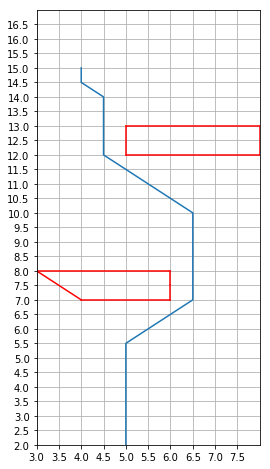

In [2]:
node_radius = 0.5
xy_res = 0.5
start = (5, 2)
end = (4, 15)
XYBounds = [3, 8, 2, 17]
obstaclesVertices = [
    [Vec2d(4, 7), Vec2d(6,7), Vec2d(6,7.5), Vec2d(6, 8), Vec2d(3, 8)],
    [Vec2d(8, 12), Vec2d(5, 12), Vec2d(5, 13), Vec2d(8, 13)],
#     [Vec2d(3, 8), Vec2d(6, 8)]
]

grSearch = GridSearch(node_radius, xy_res)
path = grSearch.generateAStartPath(*start, *end, XYBounds, obstaclesVertices)
grSearch.plot_path((4,8), path)

In [3]:
reference_line = Path(path)

numKnots = 100
MAX_L = 3
MAX_dL = 2
MAX_ddL = 0.19
MAX_dddL = 0.076

l_boundaries = reference_line.generateBoundaries(numKnots, obstaclesVertices, MAX_L)
dl_boundaries = [(-MAX_dL, MAX_dL) for i in range(numKnots)]
ddl_boundaries = [(-MAX_ddL, MAX_ddL) for i in range(numKnots)]
dddl_boundary = (-MAX_dddL, MAX_dddL)

# w_x_ref = [0 for i in range(numKnots)]
# x_ref = [0 for i in range(numKnots)]
# w_end_state = [0, 0, 0]
# end_state_ref = [0, 0, 0]

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 300, constraints m = 600
          nnz(P) + nnz(A) = 1692
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.00, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   1.00e-01   7.21e+02   1.00e-01   3.25e-04s
  50   3.9075e+00   2.41e-04   2.85e-03   1.00e-01   1.53e-03s

status:               solved
number of ite

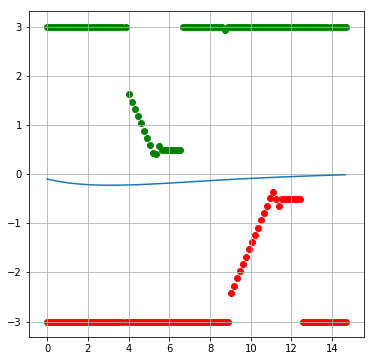

In [7]:
delta_s = reference_line.accumulated_s[-1] / (numKnots - 1)

jerkProblem = PiecewiseJerkProblem(numKnots, delta_s, (-0.1, -0.1, 0.05))

jerkProblem.set_x_bounds(l_boundaries)
jerkProblem.set_dx_bounds(dl_boundaries)
jerkProblem.set_ddx_bounds(ddl_boundaries)
jerkProblem.set_dddx_bound(dddl_boundary)
jerkProblem.set_w((1, 10, 100, 1))
# jerkProblem.set_x_ref(w_x_ref, x_ref)
# jerkProblem.set_end_state_ref(w_end_state, end_state_ref)

s, l, dl, ddl = jerkProblem.optimize(10000)

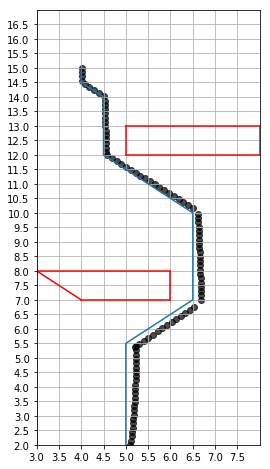

In [8]:
grid_trajectory = []
for i in range(len(s)):
    grid_trajectory.append(reference_line.SLToXY((s[i], l[i])))

grSearch.plot_path((4, 8), path, grid_trajectory)